# import the packages needed 

In [22]:
import sys
import scipy 
import numpy 
import matplotlib
import pandas
import sklearn


In [23]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## Dataset is loaded - 
IRIS , most popular Dataset set is loaded from the url 

In [24]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['sepal-length','sepal_width','petal_length','petal_width','class']
dataset=pandas.read_csv(url,names=names)



In [25]:
print(dataset.shape)

(150, 5)


In [26]:
print(dataset.head(30))

    sepal-length  sepal_width  petal_length  petal_width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [27]:
print(dataset.describe())

       sepal-length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [28]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


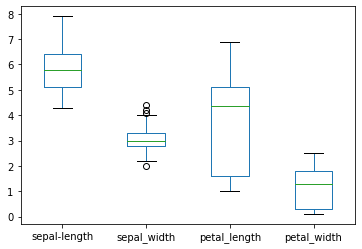

In [29]:
dataset.plot(kind='box',layout=(2,2),sharex=False,sharey=False)
plt.show()

C:\Users\shyamaharihar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


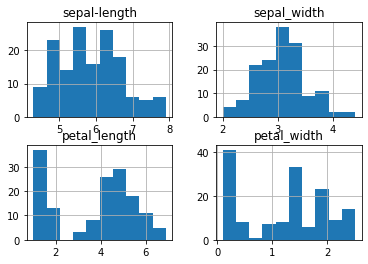

In [30]:
dataset.hist()
plt.show()

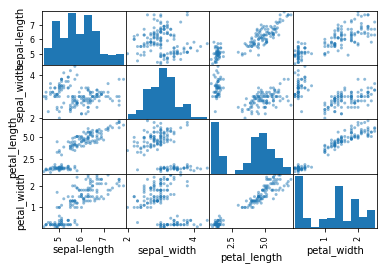

In [31]:
scatter_matrix(dataset)
plt.show()

In [32]:
array=dataset.values
X=array[0:,0:4]
Y=array[:,4]
validation_size=0.20
seed=6
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [33]:
seed=6
scoring='accuracy'


# training set

In [34]:
seed=6
models=[]
models.append(('LR',LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,shuffle=True,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s : %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)    

LR : 0.958333 (0.041667)
LDA : 0.975000 (0.038188)
KNN : 0.958333 (0.041667)
CART : 0.933333 (0.050000)
NB : 0.966667 (0.040825)
SVM : 0.941667 (0.053359)


# LDA is preferred because of the score 

# testing set 

In [35]:
seed=6
models=[]
models.append(('LR',LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,shuffle=True,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_test,Y_test,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s : %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)    

LR : 0.933333 (0.133333)
LDA : 1.000000 (0.000000)
KNN : 0.966667 (0.100000)
CART : 0.933333 (0.133333)
NB : 0.933333 (0.133333)
SVM : 0.966667 (0.100000)


In [36]:
scorelist=[]
for name,model in models:
    model.fit(X_train,Y_train)
    scorelist.append(model.score(X_test,Y_test))
print(scorelist)    


[0.9666666666666667, 1.0, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0]


# LR 96.7% 
# LDA  100% 
# KNN 96.7%
# CART 93% 
# GNB 93%
# SVM 100%